In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
%matplotlib inline

In [2]:
house_df = pd.read_csv("C:/Users/luanb/OneDrive/Documentos/Análises e datasets/Synthetic House pricing dataset.csv")

In [3]:
house_df.head()

,House Size (sqft),Bedrooms,Bathrooms,Lot Size (sqft),Year Built,Neighborhood,Garage Spaces,Pool,Fireplace,Basement,Renovated,School Rating,Price (USD)
0,2450.0,3,2.5,5900.0,2001,Suburban,2,1,0,1,1,8,360000.0
1,2000.0,2,1.0,4700.0,1992,Urban,1,0,1,0,0,7,275000.0
2,3100.0,4,3.0,7200.0,2008,Rural,2,1,1,0,1,6,485000.0
3,2150.0,3,2.0,5100.0,1995,Suburban,2,0,1,1,0,8,330000.0
4,2900.0,4,3.0,6700.0,2010,Urban,2,1,0,0,1,7,430000.0


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House Size (sqft)  108 non-null    float64
 1   Bedrooms           108 non-null    int64  
 2   Bathrooms          108 non-null    float64
 3   Lot Size (sqft)    108 non-null    float64
 4   Year Built         108 non-null    int64  
 5   Neighborhood       108 non-null    object 
 6   Garage Spaces      108 non-null    int64  
 7   Pool               108 non-null    int64  
 8   Fireplace          108 non-null    int64  
 9   Basement           108 non-null    int64  
 10  Renovated          108 non-null    int64  
 11  School Rating      108 non-null    int64  
 12  Price (USD)        108 non-null    float64
dtypes: float64(4), int64(8), object(1)
memory usage: 11.1+ KB


In [5]:
#Changing neighborhood values 
neigh_dic = {"Suburban": 1, "Urban": 2, "Rural":3}
house_df["Neighborhood"]=house_df["Neighborhood"].replace(neigh_dic)

C:\Users\luanb\AppData\Local\Temp\ipykernel_2496\3124648538.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_df["Neighborhood"]=house_df["Neighborhood"].replace(neigh_dic)


In [6]:
house_df

,House Size (sqft),Bedrooms,Bathrooms,Lot Size (sqft),Year Built,Neighborhood,Garage Spaces,Pool,Fireplace,Basement,Renovated,School Rating,Price (USD)
0,2450.0,3,2.5,5900.0,2001,1,2,1,0,1,1,8,360000.0
1,2000.0,2,1.0,4700.0,1992,2,1,0,1,0,0,7,275000.0
2,3100.0,4,3.0,7200.0,2008,3,2,1,1,0,1,6,485000.0
3,2150.0,3,2.0,5100.0,1995,1,2,0,1,1,0,8,330000.0
4,2900.0,4,3.0,6700.0,2010,2,2,1,0,0,1,7,430000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2200.8,3,2.0,5000.4,1990,1,2,0,1,1,1,8,320000.8
104,2900.4,4,3.0,6800.5,2005,2,2,1,0,0,1,7,420000.4
105,2600.6,4,2.5,6200.9,2002,3,2,1,0,0,1,6,380000.6
106,2300.7,3,2.0,5400.2,1998,1,1,1,1,1,1,8,335000.7


In [7]:
house_df.corr()

,House Size (sqft),Bedrooms,Bathrooms,Lot Size (sqft),Year Built,Neighborhood,Garage Spaces,Pool,Fireplace,Basement,Renovated,School Rating,Price (USD)
House Size (sqft),1.000000,0.923722,0.931660,0.974911,0.913474,0.592005,0.823458,0.638472,0.183084,-0.080250,0.431849,0.146587,0.955784
Bedrooms,0.923722,1.000000,0.959029,0.927279,0.888893,0.551958,0.816763,0.592922,0.180458,-0.098938,0.535358,0.090501,0.866480
Bathrooms,0.931660,0.959029,1.000000,0.954089,0.924659,0.521099,0.905610,0.647486,0.183565,0.008817,0.525276,0.212773,0.934252
Lot Size (sqft),0.974911,0.927279,0.954089,1.000000,0.915272,0.578083,0.834029,0.647472,0.168549,-0.103139,0.464319,0.151900,0.946184
Year Built,0.913474,0.888893,0.924659,0.915272,1.000000,0.353664,0.851841,0.669785,0.129137,0.150121,0.445795,0.289197,0.916033
Neighborhood,0.592005,0.551958,0.521099,0.578083,0.353664,1.000000,0.304130,0.484795,-0.167405,-0.660002,0.375838,-0.574531,0.452630
Garage Spaces,0.823458,0.816763,0.905610,0.834029,0.851841,0.304130,1.000000,0.426834,0.348288,0.285592,0.344329,0.494607,0.914398
Pool,0.638472,0.592922,0.647486,0.647472,0.669785,0.484795,0.426834,1.000000,-0.310889,-0.086110,0.418004,-0.137297,0.598639
Fireplace,0.183084,0.180458,0.183565,0.168549,0.129137,-0.167405,0.348288,-0.310889,1.000000,0.314399,-0.175412,0.577874,0.261531
Basement,-0.080250,-0.098938,0.008817,-0.103139,0.150121,-0.660002,0.285592,-0.086110,0.314399,1.000000,-0.190975,0.804311,0.105727


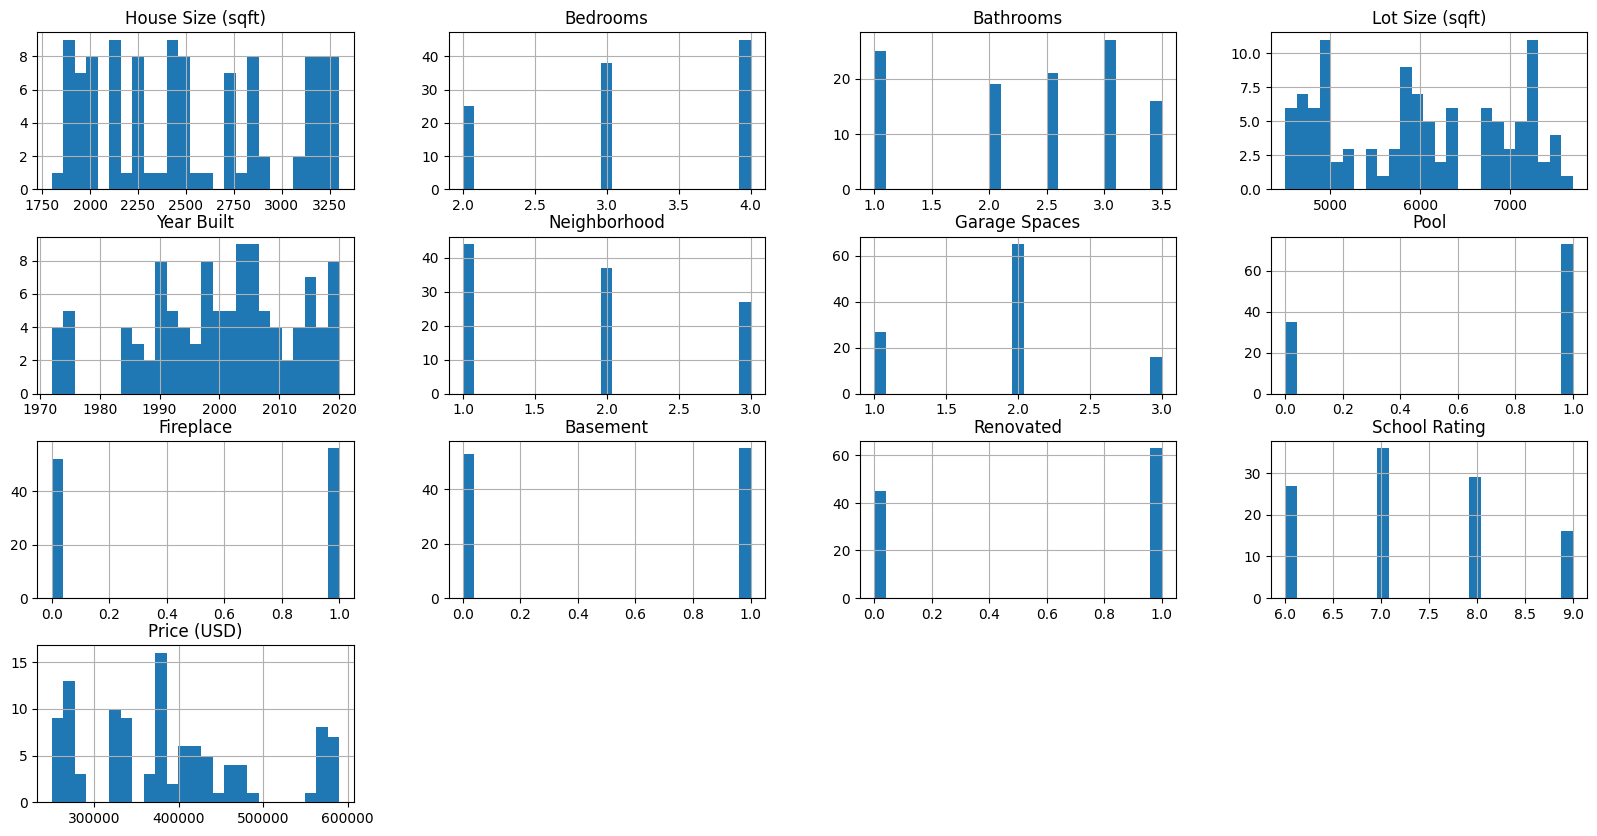

In [8]:
house_df.hist(bins=25, figsize=(20,10))
plt.show()

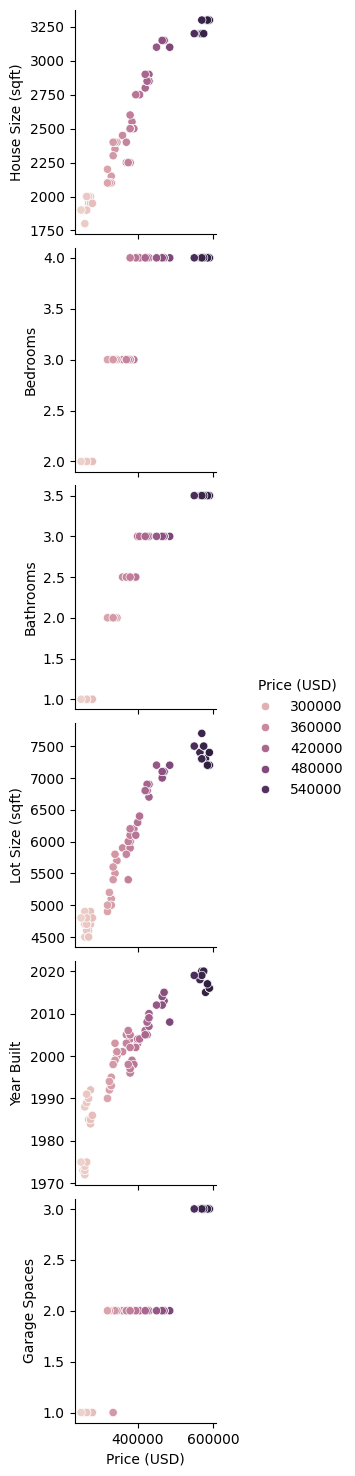

In [9]:
sns.pairplot(house_df, hue="Price (USD)", x_vars="Price (USD)", y_vars=["House Size (sqft)", "Bedrooms", 
                                                                        "Bathrooms", "Lot Size (sqft)", "Year Built", "Garage Spaces"])

In [12]:
#Setting targets and features
y = house_df["Price (USD)"]
x = house_df[["House Size (sqft)", "Bedrooms", "Bathrooms", "Lot Size (sqft)", "Year Built", "Garage Spaces"]]

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [13]:
#Create model
model_house = LinearRegression()

In [14]:
model_house.fit(X_train, y_train)

LinearRegression()

In [15]:
#Predictions
house_y_predic = model_house.predict(X_test)

In [16]:
print(f'Mean squared error:  {mean_squared_error(y_test, house_y_predic):.2f}')
print(f'R2 score:  {r2_score(house_y_predic, y_test):.2f}')
print(f'Mean absolute error:  {mean_absolute_error(y_test, house_y_predic):.2f}')

Mean squared error:  284217459.34
R2 score:  0.97
Mean absolute error:  13733.14
